In [1]:
# Install required packages
!pip install tensorflow
!pip install keras
!pip install keras-tuner
!pip install shap

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
#tf.compat.v1.disable_eager_execution()
from tensorflow import keras

import keras_tuner as kt
import shap
shap.initjs()

import warnings

In [3]:
npca_X_train_data = pd.read_csv('data/impv/without_pca/X_train.csv')
npca_X_test = pd.read_csv('data/impv/without_pca/X_test.csv').values
npca_X_train = npca_X_train_data.values
npca_y_test = pd.read_csv('data/impv/without_pca/y_test.csv').values
npca_y_train = pd.read_csv('data/impv/without_pca/y_train.csv').values


X_test = pd.read_csv('data/impv/X_test.csv').values
X_train = pd.read_csv('data/impv/X_train.csv').values
y_test = pd.read_csv('data/impv/y_test.csv').values
y_train = pd.read_csv('data/impv/y_train.csv').values

### Building the model

In [4]:
def build_model(X_train, y_train):
    count = 1
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(64, input_shape=(X_train.shape[1],), activation='relu', name="input_layer"))
    model.add(tf.keras.layers.Dense(64, activation='relu', name="hidden_1"))
    model.add(tf.keras.layers.Dense(64, activation='relu', name="hidden_2"))
    model.add(tf.keras.layers.Dense(1, name="output_layer")) 
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse')
    
    # Train the model
    history = model.fit(X_train, y_train, epochs = 200, verbose = 0, validation_split=0.2)
    return model, history

In [5]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error Life Expectancy')
    plt.legend()
    plt.grid(True)

### First model with compressed dataset after PCA

Following network architecture:
- One input layer with 64 output units and relu as activation function.
- Two hidden layers with 64 output units each and relue activation funciton.
- Output layers with 1 output units and linear (the default activation function in keras)

In [6]:
import tensorflow as tf
from tensorflow.keras import backend as K

def build_model(X_train, y_train):
    # Clear any previous model from memory
    K.clear_session()

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)  # Output layer
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2)

    return model, history


In [7]:
%%time
model1, history1 = build_model(X_train, y_train)

C:\Users\Sakshi Kumari\ds_base\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1821.7755 - mae: 33.4918 - val_loss: 181.1714 - val_mae: 10.7099
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 149.0025 - mae: 9.5822 - val_loss: 125.9733 - val_mae: 8.8357
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 102.9509 - mae: 7.9138 - val_loss: 92.2357 - val_mae: 7.4571
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 70.6275 - mae: 6.4835 - val_loss: 62.8958 - val_mae: 5.9914
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 47.3441 - mae: 5.2412 - val_loss: 42.2171 - val_mae: 4.8390
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29.7530 - mae: 4.1268 - val_loss: 25.8488 - val_mae: 3.7726
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.2259 - mae: 3.2204 - val_loss: 18.4110 - val_mae: 3.2017
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.8434 - mae: 2.7231 - val_loss: 12.2469 - val_mae: 2.6053
Epoch 9/20
148/148 ━━━━━━━━━━━━━

### Visaulise the network of first model

In [8]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,077 (105.77 KB)

 Trainable params: 9,025 (35.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,052 (70.52 KB)

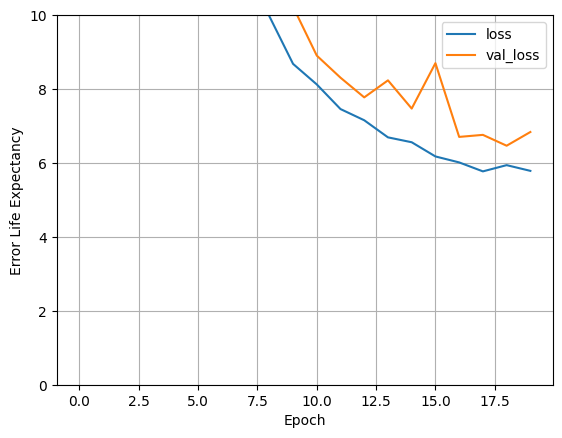

In [9]:
plot_loss(history1)

In [10]:
model1.evaluate(X_test, y_test, verbose=0)

[6.343545913696289, 1.9067109823226929]

### Second model without reducing dimension

In [11]:
%%time
model2, history2 = build_model(npca_X_train, npca_y_train)

Epoch 1/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1701.3792 - mae: 31.9281 - val_loss: 171.1628 - val_mae: 10.4466
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 120.6652 - mae: 8.5252 - val_loss: 93.3992 - val_mae: 7.5454
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 74.1107 - mae: 6.5832 - val_loss: 64.5236 - val_mae: 6.1442
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 51.5918 - mae: 5.4676 - val_loss: 46.7615 - val_mae: 5.1466
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37.7994 - mae: 4.6612 - val_loss: 36.5109 - val_mae: 4.5161
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28.4404 - mae: 4.0457 - val_loss: 28.0504 - val_mae: 3.9845
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.3111 - mae: 3.5157 - val_loss: 21.6052 - val_mae: 3.4865
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.2460 - mae: 3.0749 - val_loss: 15.6873 - val_mae: 2.9432
Epoch 9/20
148/148 ━━━━━━━━━━━━━━━

In [12]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,805 (112.52 KB)

 Trainable params: 9,601 (37.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,204 (75.02 KB)

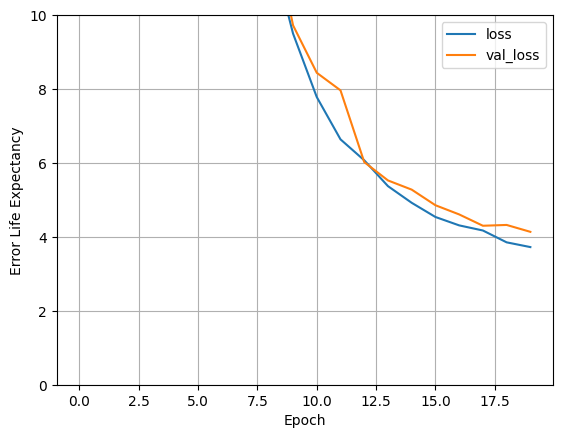

In [13]:
plot_loss(history2)

In [14]:
model2.evaluate(npca_X_test, npca_y_test, verbose=0)

[4.132973670959473, 1.5369813442230225]

### Tuning some of the hyperparameters

Here we are trying to find the number of hidden layres and number of nueron on it.

In [15]:
def build_tune_model(hp):
    model = keras.Sequential()
    
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(keras.layers.Dense(units=hp.Int('units_' + str(i),
                                                  min_value=32,
                                                  max_value=512,
                                                  step=8),
                                     activation='relu'))
    
    model.add(keras.layers.Dense(1))
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mse')
    return model

In [16]:
def Random_Search(project_name):
    tuner = kt.RandomSearch(
        build_tune_model,
        objective='val_loss',
        directory='project',
        project_name=project_name
    )
    return tuner

In [17]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [18]:
npca_tuner = Random_Search("life expectancy npca")
npca_tuner.search(npca_X_train, npca_X_train, epochs=200, validation_split=0.2, callbacks=[stop_early])

Reloading Tuner from project\life expectancy npca\tuner0.json


In [19]:
best_model3 = npca_tuner.get_best_hyperparameters(num_trials=1)[0]

### Third model without reducing dimension

In [20]:
%%time
model3 = npca_tuner.hypermodel.build(best_model3)
history3 = model3.fit(npca_X_train, npca_y_train, epochs=200, validation_split=0.2, verbose = 0)

CPU times: total: 1min 45s
Wall time: 1min 14s


In [21]:

val_loss_per_epoch1 = history3.history['val_loss']
best_epoch = val_loss_per_epoch1.index(min(val_loss_per_epoch1)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 193


In [22]:
%%time
hypermodel1 = npca_tuner.hypermodel.build(best_model3)
# Retrain the model
history3 = hypermodel1.fit(npca_X_train, npca_y_train, epochs=best_epoch, validation_split=0.2, verbose = 0)

CPU times: total: 1min 38s
Wall time: 1min 8s


In [23]:
hypermodel1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 352)                 │           6,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │          11,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,221 (223.52 KB)

 Trainable params: 19,073 (74.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,148 (149.02 KB)

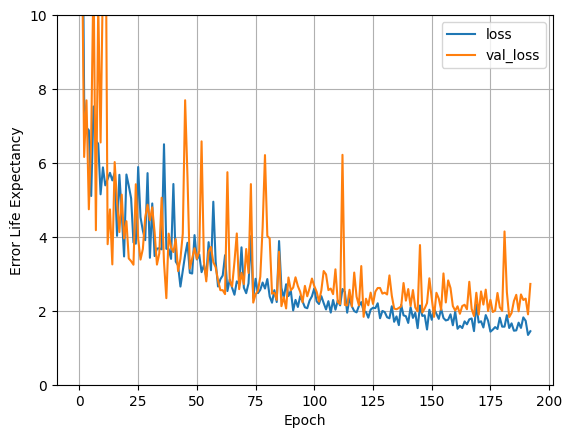

In [24]:
plot_loss(history3)

In [25]:
hypermodel1.evaluate(npca_X_test, npca_y_test, verbose=0)

2.6270508766174316

### Fourth model without reducing dimension

In [26]:
tuner = Random_Search("life expectancy")
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

Reloading Tuner from project\life expectancy\tuner0.json


In [27]:
best_model = tuner.get_best_hyperparameters(num_trials=1)[0]

In [28]:
%%time

model4 = tuner.hypermodel.build(best_model)
history4 = model4.fit(X_train, y_train, epochs=200, validation_split=0.2, verbose = 0,)

CPU times: total: 2min 11s
Wall time: 1min 25s


In [29]:
val_loss_per_epoch2 = history4.history['val_loss']
best_epoch = val_loss_per_epoch2.index(min(val_loss_per_epoch2)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 195


In [33]:
%%time
hypermodel2 = tuner.hypermodel.build(best_model)
# Retrain the model
history4 = hypermodel2.fit(X_train, y_train, epochs=best_epoch, validation_split=0.2, verbose = 0)

CPU times: total: 2min 8s
Wall time: 1min 24s


In [31]:
hypermodel2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 416)                 │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 56)                  │          23,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 416)                 │          23,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 32)                  │          13,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 196,973 (769.43 KB)

 Trainable params: 65,657 (256.47 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 131,316 (512.96 KB)

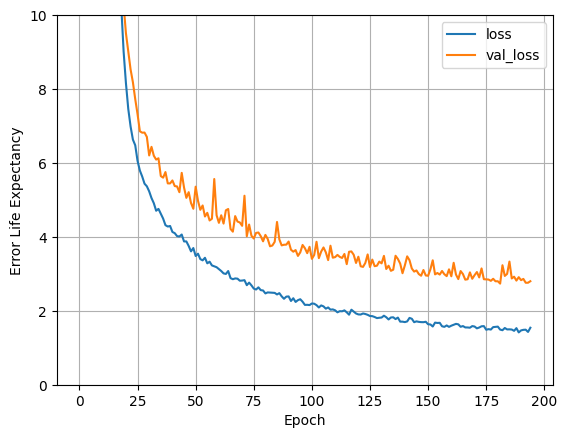

In [32]:
plot_loss(history4)

In [ ]:
hypermodel2.evaluate(X_test, y_test, verbose=0)

### Best performing model interpertation

Let's try to identify the impact of features on the output of model using <a href="https://shap.readthedocs.io/en/latest/index.html">SHAP</a> package.

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
%%time
train_summary = shap.kmeans(npca_X_train, 10)
explainer = shap.KernelExplainer(hypermodel1.predict, train_summary)
shap_values = explainer.shap_values(npca_X_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  0%|          | 0/5913 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
652/652 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 822us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
652/65

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 769us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 770us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 991us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
652/65

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 786us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
652/65

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 837us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 829us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 803us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [ ]:
shap.summary_plot(shap_values[0], npca_X_train_data)